In [1]:
import random
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from networks.vae import *

In [2]:
batch_size = 32

In [3]:
train_generator = ImageDataGenerator(rescale= 1/255)
train_dataset = train_generator.flow_from_directory('data/semantic256x256',
                                                    batch_size=batch_size,
                                                    target_size=(256, 256),
                                                   class_mode='input',
                                                   shuffle=True,
                                                   seed=123)

# train_dataset = tf.keras.utils.image_dataset_from_directory(
#     'data/semantic',
#     seed=123,
#     image_size=(256, 256),
#     batch_size=batch_size,
#     shuffle=True
# )

Found 52972 images belonging to 1 classes.


In [4]:
test_generator = ImageDataGenerator(rescale= 1/255)
test_dataset = test_generator.flow_from_directory('data/semantic256x256_test',
                                                    batch_size=batch_size,
                                                    target_size=(256, 256),
                                                   class_mode='input',
                                                   shuffle=True,
                                                   seed=123)

# test_dataset = tf.keras.utils.image_dataset_from_directory(
#     'data/semantic_test',
#     seed=123,
#     image_size=(256, 256),
#     batch_size=batch_size,
#     shuffle=True
# )

Found 6997 images belonging to 1 classes.


In [5]:
latent_dim = 512

Run just for test

In [6]:
model = LowResolutionVariationalAutoEncoder(latent_dim = latent_dim)

In [7]:
from tensorflow.keras.utils import plot_model


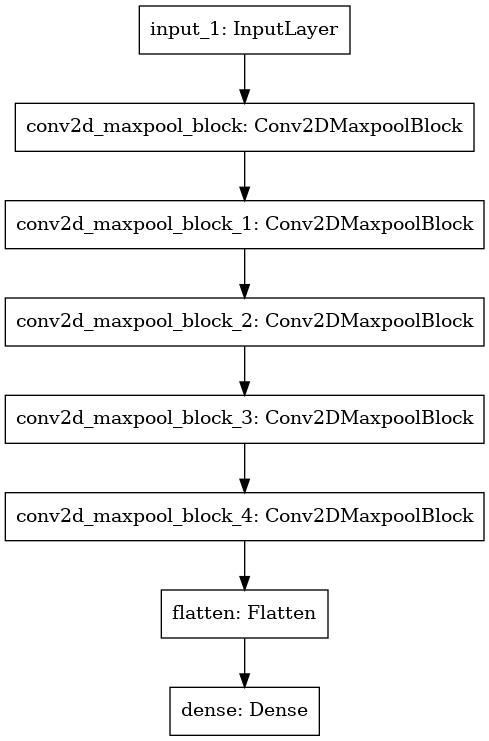

In [8]:
plot_model(model.encoder)

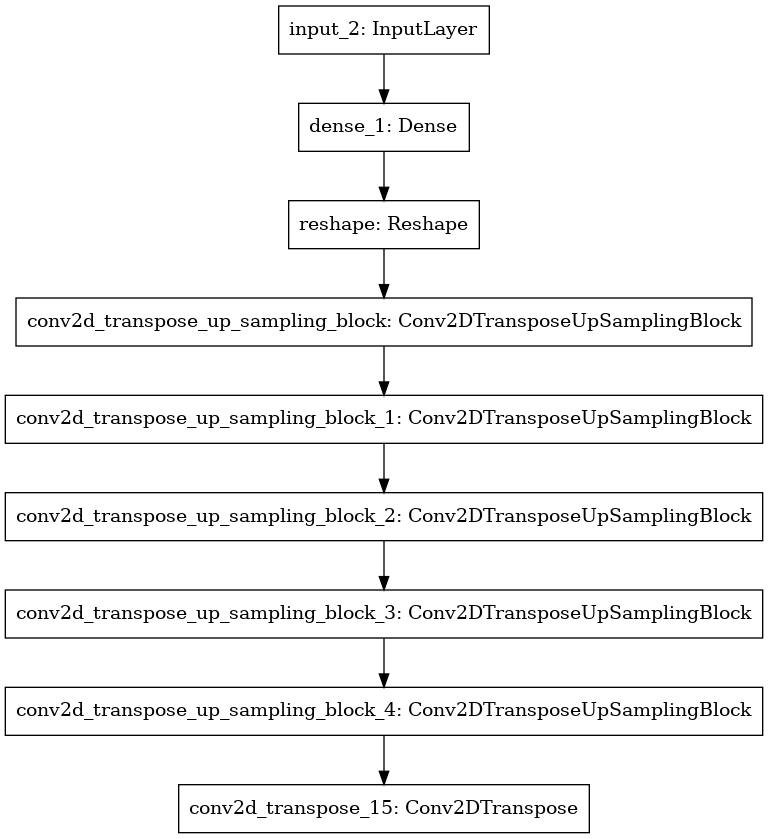

In [9]:
plot_model(model.decoder)

In [10]:
optimizer = tf.keras.optimizers.Adam()

In [11]:
epochs = 5

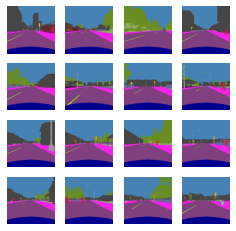

In [9]:
num_examples_to_generate = 16
assert test_dataset.batch_size >= num_examples_to_generate
for test_batch in train_dataset[2]:
    test_sample = test_batch[0:num_examples_to_generate, :, :, :]
fig = plt.figure(figsize=(4, 4))
for i in range(test_sample.shape[0]):
    plt.subplot(4, 4, i + 1)
    plt.imshow(test_sample[i, :, :, :])
    plt.axis('off')

    # tight_layout minimizes the overlap between 2 sub-plots
plt.savefig('real.png')
plt.show()


Epoch: 5, Test set ELBO: -111963.0234375, time elapse for current epoch: 201.39339184761047


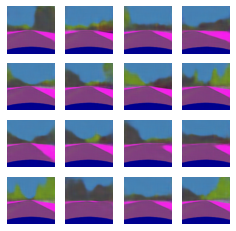

In [20]:
# testing model on a smaller dataset
losses = train_model(model, test_dataset , test_dataset, epochs, optimizer, test_sample = test_sample)

Epoch: 20, Test set ELBO: -111105.2890625, time elapse for current epoch: 1897.0854251384735


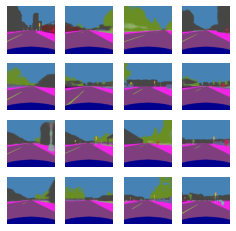

model saved!!!


In [10]:
model = LowResolutionVariationalAutoEncoder(latent_dim = latent_dim)
optimizer = tf.keras.optimizers.Adam()
epochs = 20
losses = train_model(model, train_dataset , test_dataset, epochs, optimizer, test_sample = test_sample)

In [11]:
import imageio
import glob
anim_file = 'cvae.gif'

with imageio.get_writer(anim_file, mode='I') as writer:
    filenames = glob.glob('progress/image*.png')
    filenames = sorted(filenames)
    for filename in filenames:
        image = imageio.imread(filename)
        writer.append_data(image)


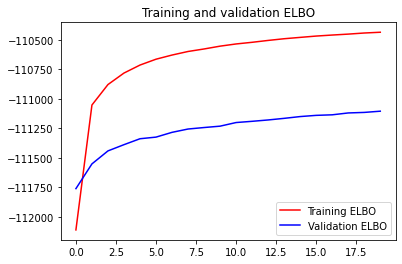

<Figure size 432x288 with 0 Axes>

In [12]:
plt.plot(range(epochs), [l[1] for l in losses], 'r', label='Training ELBO')
plt.plot(range(epochs), [l[0] for l in losses], 'b', label='Validation ELBO')
plt.title('Training and validation ELBO')
plt.legend(loc=0)
plt.figure()

plt.show()

In [6]:
num_examples_to_generate = 16
assert test_dataset.batch_size >= num_examples_to_generate
for test_batch in test_dataset[40]:
    test_sample = test_batch[0:num_examples_to_generate, :, :, :]

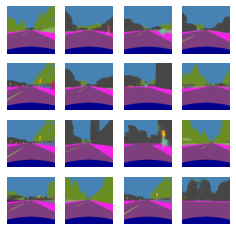

In [25]:
mean, logvar = model.encode(test_sample)
z = model.reparameterize(mean, logvar)
predictions = model.sample(z)
fig = plt.figure(figsize=(4, 4))

for i in range(predictions.shape[0]):
    plt.subplot(4, 4, i + 1)
    plt.imshow(predictions[i, :, :, :])
    plt.axis('off')

# tight_layout minimizes the overlap between 2 sub-plots
plt.show()

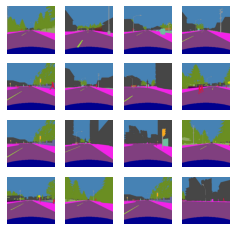

In [26]:
fig = plt.figure(figsize=(4, 4))

for i in range(test_sample.shape[0]):
    plt.subplot(4, 4, i + 1)
    plt.imshow(test_sample[i, :, :, :])
    plt.axis('off')

# tight_layout minimizes the overlap between 2 sub-plots
#   plt.savefig('real.png')
plt.show()
  

In [6]:
current_time = datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
model.save_weights(f"checkpoints/vae{current_time}/checkpoint")

NameError: name 'model' is not defined

If you want to start from a checkpoint, start from here.

In [6]:
check_point = '20220820-093736'
model = LowResolutionVariationalAutoEncoder(latent_dim = latent_dim)
model.load_weights(f"checkpoints/vae{check_point}/checkpoint")
epochs = 20


In [7]:
optimizer = tf.keras.optimizers.Adam(0.0001)

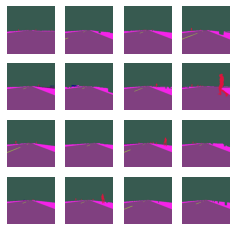

In [8]:
num_examples_to_generate = 16
assert test_dataset.batch_size >= num_examples_to_generate
for test_batch in test_dataset[0]:
    test_sample = test_batch[0:num_examples_to_generate, :, :, :]
fig = plt.figure(figsize=(4, 4))
for i in range(test_sample.shape[0]):
    plt.subplot(4, 4, i + 1)
    plt.imshow(test_sample[i, :, :, :])
    plt.axis('off')

    # tight_layout minimizes the overlap between 2 sub-plots
plt.savefig('real.png')
plt.show()


Epoch: 43, Test set ELBO: -120282.7734375, time elapse for current epoch: 2660.0420358181


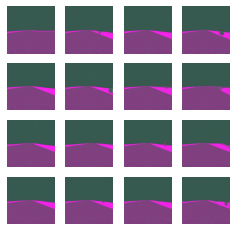

Epoch 44:  35%|███▍      | 576/1656 [06:25<12:16,  1.47it/s, ELBO=tf.Tensor(-120203.59, shape=(), dtype=float32)] 

In [ ]:
losses = train_model(model,
                     train_dataset,
                     test_dataset,
                     epochs, 
                     optimizer, 
                     test_sample = test_sample,
                     start_epoch = 42,
                     check_point= check_point
                    )

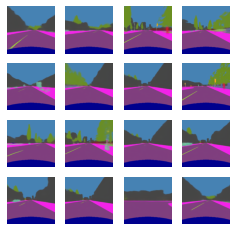

In [10]:
mean, logvar = model.encode(test_sample)
z = model.reparameterize(mean, logvar)
predictions = model.sample(z)
fig = plt.figure(figsize=(4, 4))

for i in range(predictions.shape[0]):
    plt.subplot(4, 4, i + 1)
    plt.imshow(predictions[i, :, :, :])
    plt.axis('off')

# tight_layout minimizes the overlap between 2 sub-plots
plt.show()

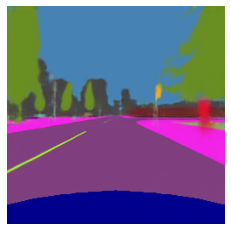

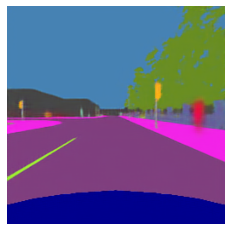

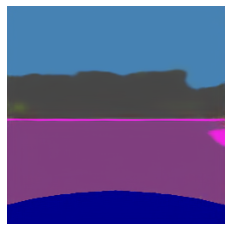

In [13]:
mean, logvar = model.encode(test_sample)
z = model.reparameterize(mean, logvar)
predictions = model.sample(z)
for i in [2,7,14]:
    plt.imshow(predictions[i, :, :, :],)
    plt.axis("off")
    plt.show()

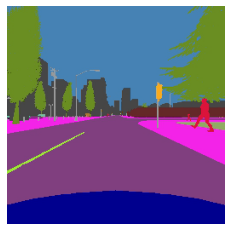

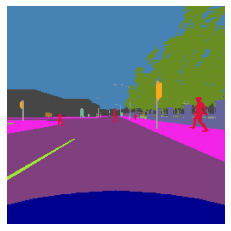

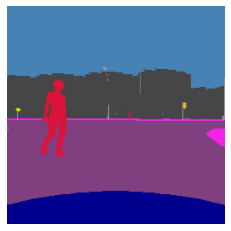

In [14]:
for i in [2,7,14]:
    plt.imshow(test_sample[i, :, :, :])
    plt.axis("off")
    plt.show()